# **10. Discrete Random Variables 2**

In [7]:
import itertools
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
import seaborn as sns
import sys

sys.path.insert(0, "/home/ubuntu/learning/probability-and-random-variables/")

from probs_module.module_proba_10 import *

## Case 1 - Conditional PMF Given an Event

Pada kasus ini kita akan membahas mengenai bagaimana PMF dapat berubah jika sebuah kondisi sudah terjadi terlebih dahulu.

Misal, pada kasus pelemparan sebuah dadu:

<center><img src="https://www.frontlinegaming.org/wp-content/uploads/2017/12/Rolling-Dice.jpg" alt="Drawing" style="height:250px;"/></center>

In [8]:
n_rolls = 1000000
space, res = dice_rolls(n = n_rolls)

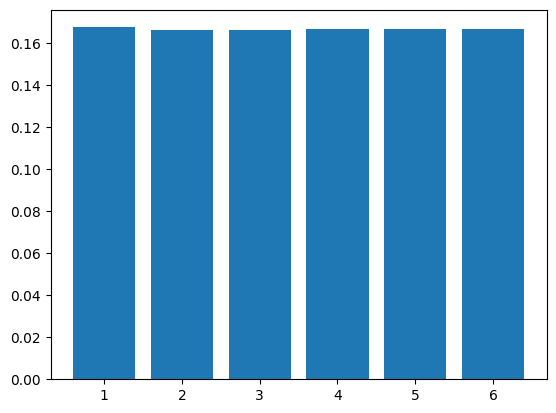

In [9]:
dice_PMF(space,res)

Pada kasus pelemparan dadu dengan 6 sisi diperoleh PMF seperti hasil di atas.

Nah, bagaimana jika terdapat sebuah kondisi yang sudah diketahui, dengan kondisi tersebut disimbolkan dengan $A$. Dimana:

$$A = \{X < 5\}$$

### Conditional PMF on an Event

Jika kondisi $A$ sudah diketahui terlebih dahulu, maka kita dapat melakukan _filtering_ terhadap hasil yang tidak memenuhi kondisi tersebut. 

In [10]:
def filter_a(result, threshold=5):
    filtered_res = [a for a in result if a < threshold]
    return filtered_res

In [11]:
filtered_res = filter_a(res, threshold=5)

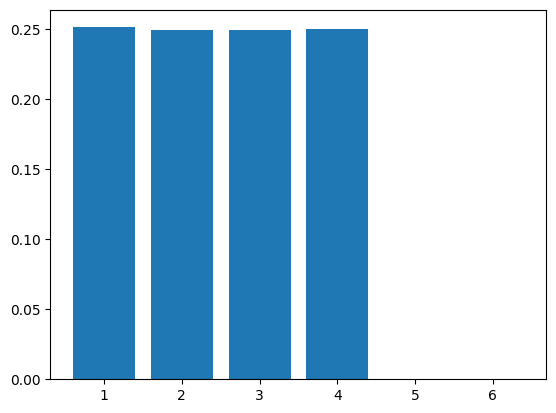

In [12]:
dice_PMF(space,filtered_res)

Dapat terlihat bahwa nilai PMF nya berubah.

Bagaimana jika kondisinya berubah menjadi

$$A = \{ X < 3 \}$$

Coba isi cell berikut:

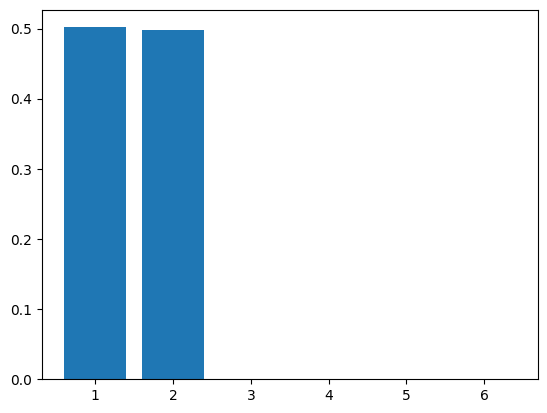

In [13]:
filtered_res = filter_a(res, threshold=3)
dice_PMF(space,filtered_res)

## Case 2.1 - Conditional PMF Given Another Random Variable

Pada kasus ini kita akan membahas mengenai bagaimana PMF dapat berubah jika sebuah kondisi sudah terjadi terlebih dahulu dan kondisi yang sudah terjadi merupakan variabel random lain.

Misal, pada kasus pelemparan dua buah dadu:

<center><img src="https://www.thoughtco.com/thmb/o7yjd5i1Iea7XnStAZEiaOSNsLE=/1500x844/smart/filters:no_upscale()/TwoDice-58bddad45f9b58af5c4aa0d4.jpg" alt="Drawing" style="height:250px;"/></center>

In [14]:
space,res = multiple_dice_rolls(side=4, n=160000)

In [15]:
def heatmap_plot(space, roll_res):
    dist_res = Dist(roll_res)
    proba = np.array([dist_res[str(j)+str(k)]/len(roll_res) for j in space for k in space])
    reshaped_proba = proba.reshape(len(space),len(space))
    
    sns.heatmap(reshaped_proba, annot=True, 
                vmax=1.0, vmin=0.0,linewidths=.1,
                annot_kws={"fontsize":14})
    plt.xticks(np.array(range(len(space)))+0.5,range(1,len(space)+1), size=14)
    plt.yticks(np.array(range(len(space)))+0.5,range(1,len(space)+1), size=14)
    plt.xlabel("Event 2", size=16)
    plt.ylabel("Event 1", size=16)
    plt.show()

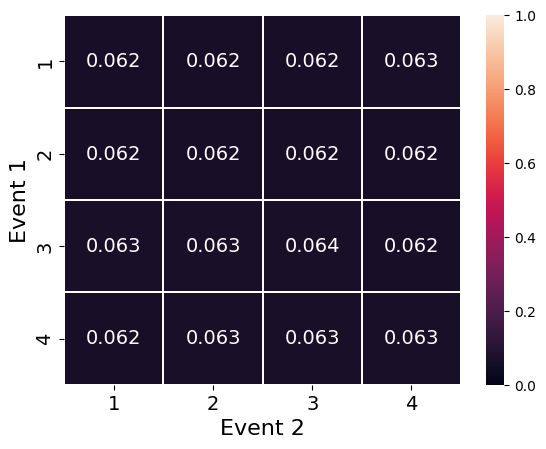

In [16]:
heatmap_plot(space,res)

Joint PMF dari pelemparan 2 buah dadu diperoleh seperti heatmap diatas.

Bagaimana jika **sudah diketahui** bahwa dadu 2 memiliki nilai 2?

$$P_{X|Y}(x,2) = P(X=x | Y=2)$$

### Conditional PMF on a Random Variable

Sama seperti kasus sebelumnya, kita dapat melakukan filter terhadap kondisi yang dimiliki oleh dadu kedua:

In [17]:
def filter_y(result, value_y=2):
    filtered_res = [a for a in result if a[1] == str(value_y)]
    return filtered_res

In [18]:
filtered_res = filter_y(res, value_y = 2)

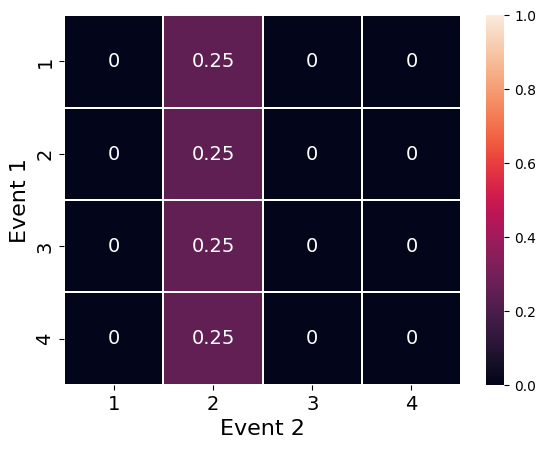

In [19]:
heatmap_plot(space,filtered_res)

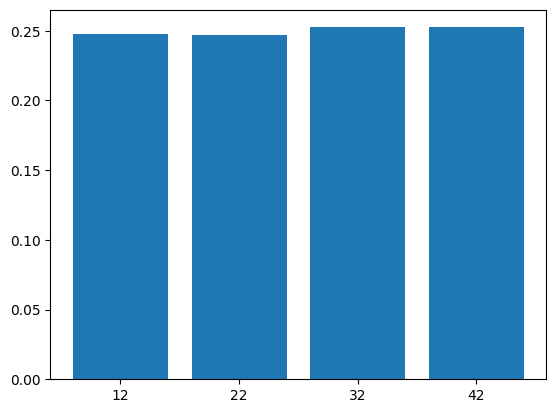

In [20]:
new_space = ['12','22','32','42']
dice_PMF(new_space,filtered_res)

> Note: '12' berarti dadu pertama bernilai 1, dadu kedua bernilai 2

Coba jika kondisi pada dadu kedua diketahui 3. Coba plot heatmap dan PMF nya

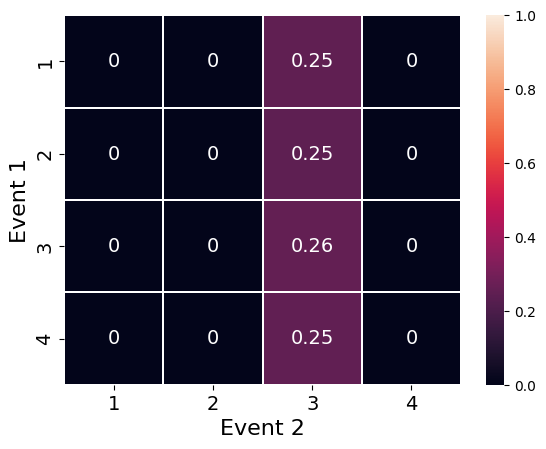

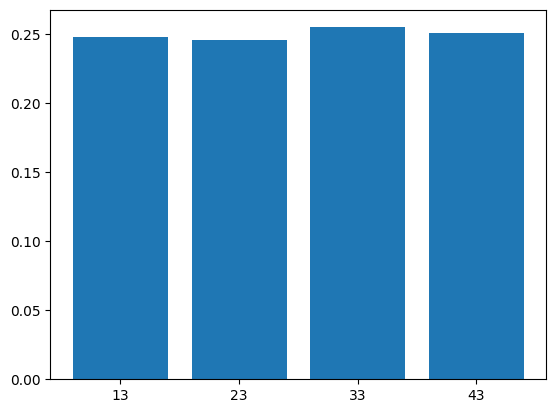

In [36]:
new_space = ['13','23','33','43']

filtered_res = filter_y(res, value_y = 3)
heatmap_plot(space,filtered_res)
dice_PMF(new_space,filtered_res)

## Case 2.2 - Conditional PMF Given Another Random Variable

Pada kasus ini diberikan dua buah variabel random dengan joint PMF sebagai berikut:

In [22]:
space = [1,2,3,4]
joint_pmf = construct_dist()

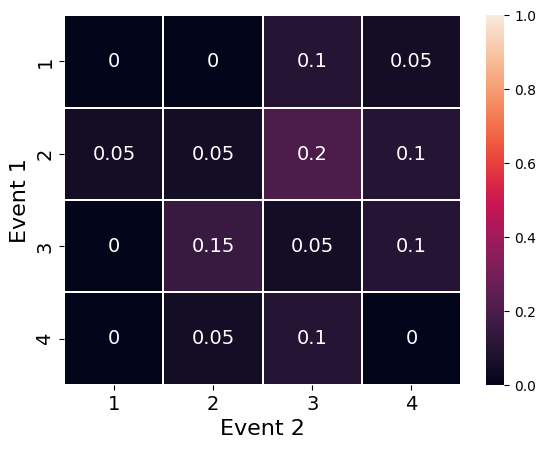

In [23]:
heatmap_plot(space, joint_pmf)

Bagaimana jika diketahui kondisi Event 2 bernilai 2?

Kita dapat melakukan filter yang sama seperti sebelumnya:

In [24]:
filtered_res = filter_y(joint_pmf, value_y=2)

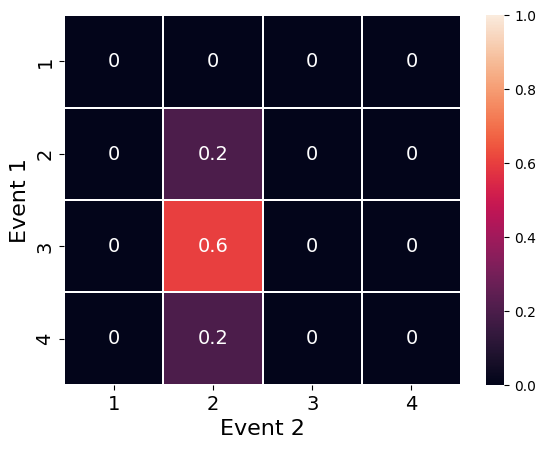

In [25]:
heatmap_plot(space, filtered_res)

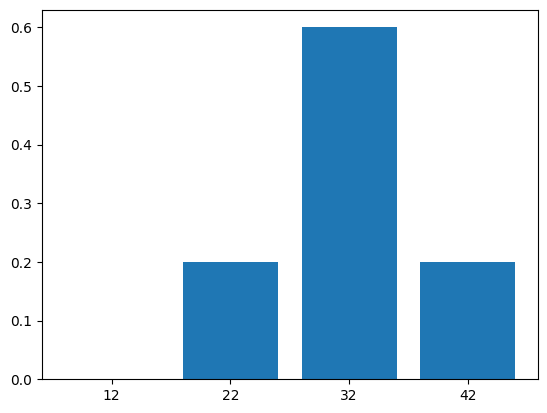

In [26]:
new_space = ['12','22','32','42']
dice_PMF(new_space,filtered_res)

Coba jika kondisi pada dadu kedua diketahui 4. Coba plot heatmap dan PMF nya

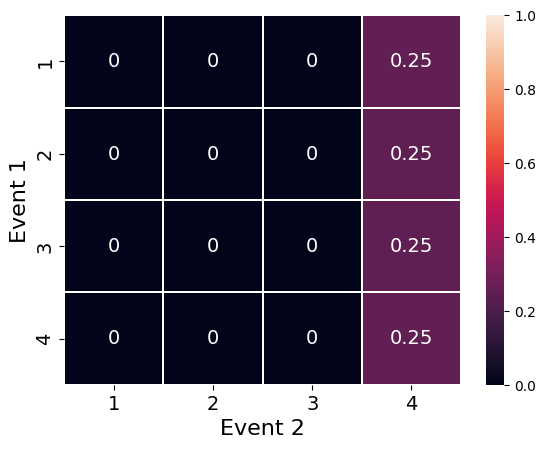

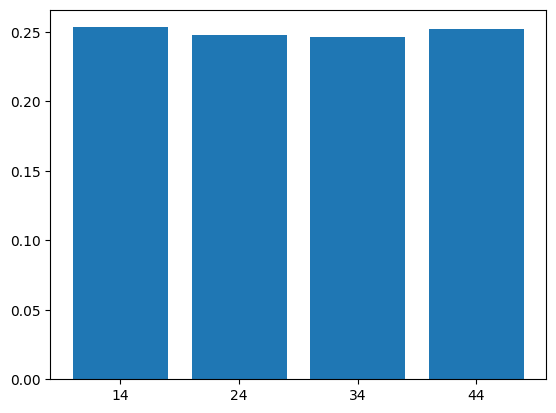

In [37]:
new_space = ['14','24','34','44']

filtered_res = filter_y(res, value_y = 4)
heatmap_plot(space,filtered_res)
dice_PMF(new_space,filtered_res)

## Case 3.1 - Independent Random Variables 

Misal, anda memiliki dua koin, X dan Y. Masing-masing koin dilempar dua kali. Maka, untuk masing-masing koin memiliki distribusi:

<center><img src="https://www.mathematics-monster.com/images4/coin_toss_twice_tree.jpg" alt="Drawing" style="height:250px;"/></center>

In [28]:
coin_x, coin_x_dist = lempar_koin(1000000, 2)
coin_y, coin_y_dist = lempar_koin(1000000, 2)

Misal, kita ingin melihat peluang untuk muncul "Head". Dengan koin x muncul kurang dari 2 head dan koin y muncul lebih dari 1.

Hal ini dapat didekati dengan 2 cara. Cara pertama yaitu dengan menghitung kejadian gabungan:

In [29]:
def count_event(coin_x, coin_y):
    counter = 0
    for i in range(len(coin_x)):
        head_x = coin_x[i].count('H')
        head_y = coin_y[i].count('H')
        if head_x < 2 and head_y > 1:
            counter += 1
    return counter

In [30]:
count_result = count_event(coin_x, coin_y)
probability_event = count_result/len(coin_x)

In [31]:
probability_event

0.187212

Atau cara kedua, yaitu dengan menghitung masing-masing nilai peluang lalu dikalikan berdasarkan aturan independensi.

In [32]:
def count_head(dist):
    counts = {0:0,1:0,2:0}
    for key,values in dist.items():
        counts[key.count('H')] += values
    return counts

In [33]:
head_count_x = count_head(coin_x_dist)
head_count_y = count_head(coin_y_dist)

In [34]:
peluang_x = Peluang({0,1}, head_count_x)
peluang_y = Peluang({2}, head_count_y)

In [35]:
probability_xy = peluang_x * peluang_y
probability_xy

0.187221851712

Dengan hasil teoretis adalah `0.1875` kedua metode menghasilkan estimasi yang cukup akurat.